In [192]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [193]:
#Loading the data (cat/noncat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [194]:
print(np.shape(train_set_y))

(1, 209)


In [195]:
print(np.shape(test_set_orig))

(50, 64, 64, 3)


In [196]:
print(np.shape(classes))

(2,)


In [197]:
print(np.shape(test_set_y))

(1, 50)


In [198]:
print(classes)

[b'non-cat' b'cat']


y= [1], it's a ‘cat


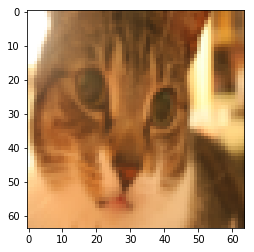

In [199]:
# Example of a picture
index = 200
example = train_set_x_orig[index]
plt.imshow(example)
print("y= " + str(train_set_y[:, index]) + ", it's a ‘" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

In [200]:
### START COODE HERE ### (# lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]
### END COOD HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [201]:
print(train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).shape)

(209, 12288)


In [202]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [203]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [204]:
len(train_set_x)

12288

In [205]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    Z --- A scalar or numpy array of anny size.
    Return:
    s --- sigmoid(z)
    """
    s = 1.0 / (1+np.exp(-z))
    return (s)

In [206]:
print(sigmoid(np.array([0, 2])))

[0.5        0.88079708]


In [232]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument:
    dim --size of the w vector we want (or number of paremeters in this case)
    
    Result:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [233]:
dim = 2
w, b = initialize_with_zeros(dim)
print(w)
print(b)

[[0.]
 [0.]]
0


In [234]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and list gradient for the propagation explained above
    
    Argument:
    w -- weight, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containg 0 if non-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    cost -- negative log-likehood cast for logistc regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write youe code step by step for the propagration.np.log(), np.dot()
    """
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1. / m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A), axis=1)
    
    dw = (1./m)*np.dot(X, ((A-Y).T))
    db = (1./m)*np.sum(((A-Y).T), axis=0)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    #print("cost:", cost)
    
    grads = {"dw" : dw,
            "db" : db}
    return grads, cost

In [235]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by runing a gradient a descent algorithm
    
    Argumnets:
    w -- weighs, a numpy array of size (num_px*num_px*3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations the optimization loop
    learning_rate -- learning rate of the gradients of the weights and bias with respect to the cost function
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w the and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    cost -- list of all the costs computed during the optimization, this will be used to plot the learning curve
    
    Tips:
    You basically need to write down two steps and iterate through them:
    1) Calculate the cost and gradient for the current parameters. Use propagate()
    2） Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("Cost after iteration %i: %f" % (i, cost))
    print("Traing is OVER!")
    params = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    return params, grads, costs

In [236]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Traing is OVER!
w = [[-0.14223355]
 [-0.04039883]]
b = [0.05091736]
dw = [[ 0.12616523]
 [-0.02415798]]
db = [-0.07516161]


In [237]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Argments:
    w -- weights, a numpy array of size (num_ps*num_px*3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [238]:
print(predict(w, b, X))

[[0. 0.]]


In [255]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    print("w_after", w)
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [256]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

X_train (12288, 209)
Y_train [0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
(12288, 1)
w [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033